In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [37]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [38]:
# target is the output feature and features names are consider as name of  the independent feature.
data = pd.DataFrame(housing.data)

In [39]:
data

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [40]:
data.columns = housing.feature_names

In [41]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [42]:
# independent features and dependent features
x = data
y = housing.target

In [43]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=30,random_state=42)

In [44]:
#  standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)


In [45]:
# to inverse the transform use : scaler.inverse_transform(x_train)

In [46]:
x_test = scaler.transform(x_test)

In [47]:
# cross validation
from sklearn.model_selection import cross_val_score

In [48]:
# implementing linear regression
# import linear regression
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
mse =cross_val_score(reg,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [49]:
np.mean(mse)

np.float64(-0.5323033352915769)

In [50]:
# prediction on test data
reg_pred = reg.predict(x_test)

In [51]:
reg_pred

array([0.73686304, 1.76121439, 2.67014019, 2.84403584, 2.61691134,
       2.02072237, 2.64542352, 2.17010974, 2.72134884, 3.89696424,
       0.93867929, 1.89662201, 1.74495085, 2.24638855, 2.55500488,
       1.91690943, 2.39781665, 2.00956795, 2.23324689, 1.14647529,
       2.90155572, 2.64994537, 1.89828217, 3.34637313, 2.24175641,
       0.91492936, 1.83202458, 1.66578014, 1.93170379, 3.2533785 ])

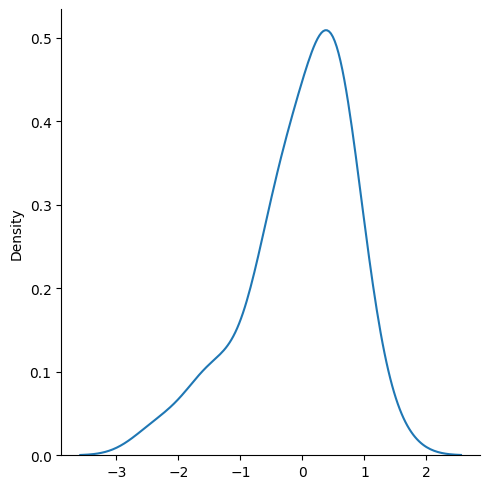

In [52]:
# how to check it is correct or not
# by using visualization
sns.displot(reg_pred-y_test,kind="kde")

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test,reg_pred)

0.5907437262872421